<a href="https://colab.research.google.com/github/shoaibahmed9010/image_classification_model_on_cifar_10/blob/main/aida_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown

In [ ]:
import gdown

url = 'https://drive.google.com/uc?export=download&id=15QfD1nPaPQaq0UyEdbiwuci-DiLY8nSm'
output = 'data.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=15QfD1nPaPQaq0UyEdbiwuci-DiLY8nSm
To: /content/data.zip
441MB [00:06, 67.2MB/s]


'data.zip'

In [ ]:
#Dataset address
data_dir='./data.zip'

In [ ]:
import zipfile
with zipfile.ZipFile(data_dir, 'r') as zf:
    zf.extractall('./')
    print('Done downloading and extraction')

Done downloading and extraction


In [ ]:
!rm './data.zip' 

In [ ]:
import numpy as np
from glob import glob

orange_files = np.array(glob("/content/data/*/*/*"))

print('There are %d total chest xray images.' % len(orange_files))

There are 4626 total chest xray images.


In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
import numpy as np

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, accuracy_score

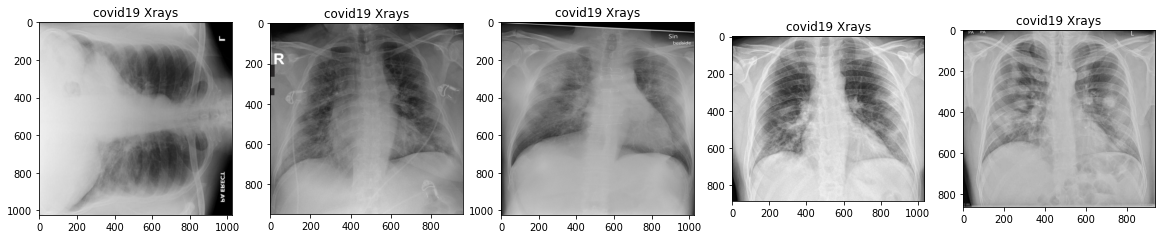

In [ ]:
plt.figure(figsize = (20,20))

for i in range(5):
    img_path  = random.choice(os.listdir('/content/data/train/covid/'))
    #img_path = os.path.join('../input/covid19-pneumonia-normal-chest-xray-pa-dataset/covid', file)
    img = plt.imread('/content/data/train/covid/' + img_path)
    ax = plt.subplot(1,5,i+1)
    ax.title.set_text('covid19 Xrays')
    plt.imshow(img)

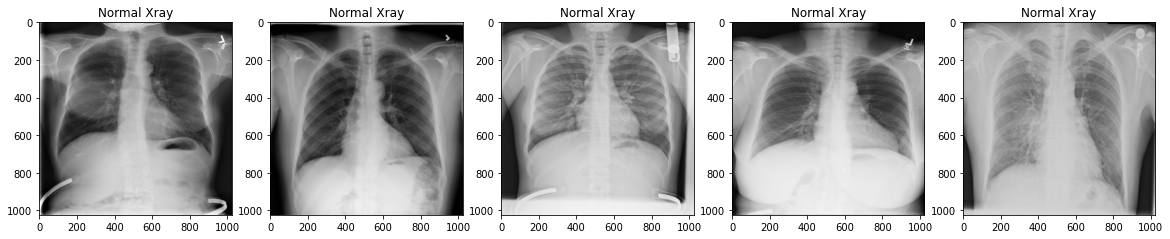

In [ ]:
plt.figure(figsize = (20,20))

for i in range(5):
    img_path  = random.choice(os.listdir('/content/data/train/normal/'))
    #img_path = os.path.join('../input/covid19-pneumonia-normal-chest-xray-pa-dataset/covid', file)
    img = plt.imread('/content/data/train/normal/' + img_path)
    ax = plt.subplot(1,5,i+1)
    ax.title.set_text('Normal Xray')
    plt.imshow(img)

In [ ]:
im_height, im_width = 256, 256
def dataset(datapath):
    data = []
    classname = []
    i =0 
    for file in os.listdir(datapath):
        img_path = os.path.join(datapath, file)
        img= cv2.imread( img_path,0)  
        img= cv2.resize(img, (im_height, im_width),interpolation = cv2.INTER_AREA)
        img= np.array(img)
        img= img.astype('float32')
        img /= 255 
        data.append(img)
        if datapath =='/content/data/train/covid'or datapath =='/content/data/valid/covid'or datapath =='/content/data/test/covid':
            classname.append('1')
        else: classname.append('0')
        i += 1
        if i%500 == 0:
            print(i, 'images done!!')
    return data, classname


In [ ]:
Xc, Yc = dataset('/content/data/train/covid')
Xn, Yn = dataset('/content/data/train/normal')

for i in range(len(Xn)):
    Xc.append(Xn[i])
for i in range(len(Yn)):
    Yc.append(Yn[i])
  
# X_train = np.asarray(Xc)
# Y_train = np.asarray(Yc)

# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])

500 images done!!
1000 images done!!
1500 images done!!
500 images done!!
1000 images done!!
1500 images done!!


In [ ]:
Xc1, Yc1 = dataset('/content/data/test/covid')
Xn1, Yn1 = dataset('/content/data/test/normal')

for i in range(len(Xn1)):
    Xc1.append(Xn1[i])
for i in range(len(Yn1)):
    Yc1.append(Yn1[i])
  
# X_test = np.asarray(Xc)
# Y_test = np.asarray(Yc)


# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [ ]:
Xc2, Yc2 = dataset('/content/data/valid/covid')
Xn2, Yn2 = dataset('/content/data/valid/normal')

for i in range(len(Xn2)):
    Xc2.append(Xn2[i])
for i in range(len(Yn2)):
    Yc2.append(Yn2[i])
  
# Val_X = np.asarray(Xc)
# Val_Y = np.asarray(Yc)


# Val_X = Val_X.reshape(Val_X.shape[0], Val_X.shape[1]*Val_X.shape[2])

In [ ]:
for i in range(len(Xc1)):
    Xc.append(Xc1[i])
for i in range(len(Yc1)):
    Yc.append(Yc1[i])


for i in range(len(Xc2)):
    Xc.append(Xc[i])
for i in range(len(Yc2)):
    Yc.append(Yc2[i])

len(Xc)

4626

In [ ]:
X = np.asarray(Xc)
Y = np.asarray(Yc)

X = X.reshape(X.shape[0], X.shape[1]*X.shape[2])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True)

X_test, Val_X, Y_test, Val_Y = train_test_split(X_test, Y_test, test_size = 0.5, shuffle = True)

In [ ]:
y_test = to_categorical(Y_test)
y_test = y_test[:,0]

y_train = to_categorical(Y_train)
y_train = y_train[:,0]

val_y = to_categorical(Val_Y)
val_y = val_y[:,0]

In [ ]:
y_test

array([0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0.

AUC score:  0.7993540535480247
Accuracy:  0.8012958963282938


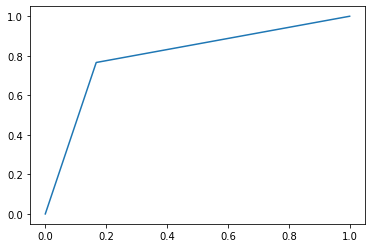

In [ ]:
#Decision Tree

DT = DecisionTreeClassifier()
model = DT.fit(X_train, y_train)

preds = DT.predict(X_test)

acc = accuracy_score(y_test, preds)

fpr, tpr, _ = roc_curve(y_test, preds)

from sklearn.metrics import roc_auc_score

area = roc_auc_score(y_test, preds)
print("AUC score: ", area)

print("Accuracy: ", acc)
plt.plot(fpr, tpr)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)
print('Confusion matrix: \n',cm)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

Accuracy:  0.9071274298056156
AUC Score:  0.90440928665044


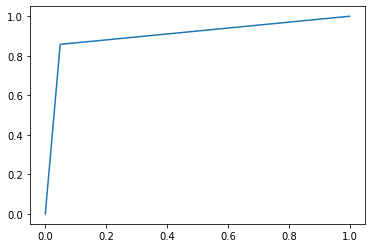

In [ ]:
#SVM

svm = SVC()

model = svm.fit(X_train, y_train)

pred2 = svm.predict(X_test)

acc = accuracy_score(y_test, pred2)

fpr, tpr, _ = roc_curve(y_test, pred2)

print("Accuracy: ", acc)
plt.plot(fpr, tpr)

area = roc_auc_score(y_test, pred2)
print("AUC Score: ", area)

Confusion matrix: 
 [[233  12]
 [ 31 187]]


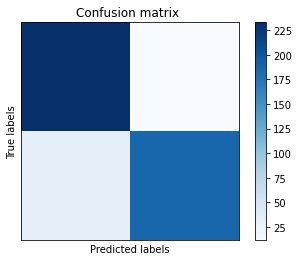

In [ ]:
cm = confusion_matrix(y_test, preds)
print('Confusion matrix: \n',cm)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

Accuracy:  0.8120950323974082
AUC Score:  0.8120857517318854


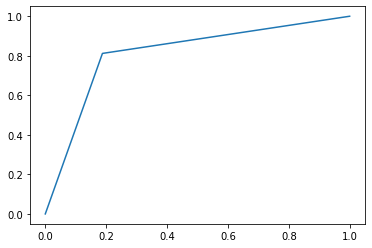

In [ ]:
#Logistic Regression

LR = LogisticRegression(solver  = 'liblinear')
model = LR.fit(X_train, y_train)
pred3 = LR.predict(X_test)

acc = accuracy_score(y_test, pred3)

fpr, tpr, _ = roc_curve(y_test, pred3)

print("Accuracy: ", acc)
plt.plot(fpr, tpr)

area = roc_auc_score(y_test, pred3)
print("AUC Score: ", area)

Confusion matrix: 
 [[199  46]
 [ 41 177]]


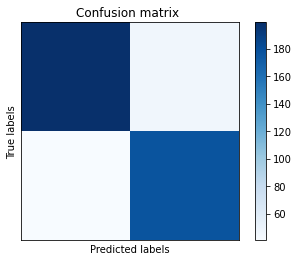

In [ ]:
cm = confusion_matrix(y_test, pred3)
print('Confusion matrix: \n',cm)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()